# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [11]:
import pandas as pd


data = pd.read_csv('data.csv')
data['plans_universitypast_failures'] = data['plans_universitypast_failures'].astype(str)
data[['plans_university', 'past_failures']] = data['plans_universitypast_failures'].str.extract(r'([-]?\d)(\d)')
data['plans_university'] = data['plans_university'].astype(int)
data['past_failures'] = data['past_failures'].astype(int)


del data['plans_universitypast_failures']


print(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3          40          2       4         5    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nu

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [13]:
data.fillna(data.mean(), inplace=True)
print(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3          40          2       4         5    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nu

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [18]:
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()

# Нормализация данных с помощью Z-score Normalization
normalized_data = scaler.fit_transform(data)

# Преобразование нормализованных данных обратно в DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

print(normalized_df)

          age      Medu      Fedu  traveltime  studytime    famrel  freetime  \
0   -0.134205  1.310216  1.540715   -0.275347   0.083653  1.119748  0.780478   
1   -0.130277  1.310216  1.540715   -0.275347  -1.122808  1.119748 -0.171647   
2   -0.134205 -1.336039 -1.188832    0.093107  -1.122808  0.072606  1.732603   
3   -0.126349 -1.336039 -0.278983    0.093107  -1.122808 -0.974536  0.780478   
4   -0.130277 -0.453954 -1.188832    0.093107   0.083653  0.072606 -1.123771   
..        ...       ...       ...         ...        ...       ...       ...   
644 -0.126349 -0.453954 -0.278983    0.830015   0.083653  0.072606 -1.123771   
645 -0.138133  1.310216  1.540715    0.093107   0.083653  0.072606 -0.171647   
646 -0.114564 -1.336039 -1.188832    0.093107   0.083653  1.119748 -0.171647   
647 -0.134205 -0.453954 -0.278983   -0.275347  -1.122808  0.072606 -0.171647   
648 -0.134205 -0.453954  0.630866   14.094352   0.083653  0.072606  1.732603   

        goout      Dalc      Walc    he

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [58]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv('data.csv')
scores = pd.read_csv('scores.csv')

# Preprocessing
# Fixing any issues mentioned in the task description (if any)

# Drop any rows with missing values
data.dropna(inplace=True)

# Remove outliers, if any
# For the sake of simplicity, let's assume no outliers are present in the data

# Split features and target
X = data.copy()
y = scores.squeeze()

# Initialize Linear Regression model
model = LinearRegression()

# Initialize KFold for cross-validation
kf = KFold(n_splits=4)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the quality of each cross-validation fold
for i, score in enumerate(cv_scores, 1):
    print(f"Cross-validation Fold {i}: {score}")

ValueError: Found input variables with inconsistent numbers of samples: [632, 648]

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [17]:
import pandas as pd

# Загрузка данных из файлов
attendance_df = pd.read_csv("attendance.csv", header=None)
school_support_df = pd.read_csv("school_support.txt", header=None)

# Добавление столбца с информацией о школьной поддержке в DataFrame с данными о посещаемости
attendance_df["school_support"] = school_support_df[0]

### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

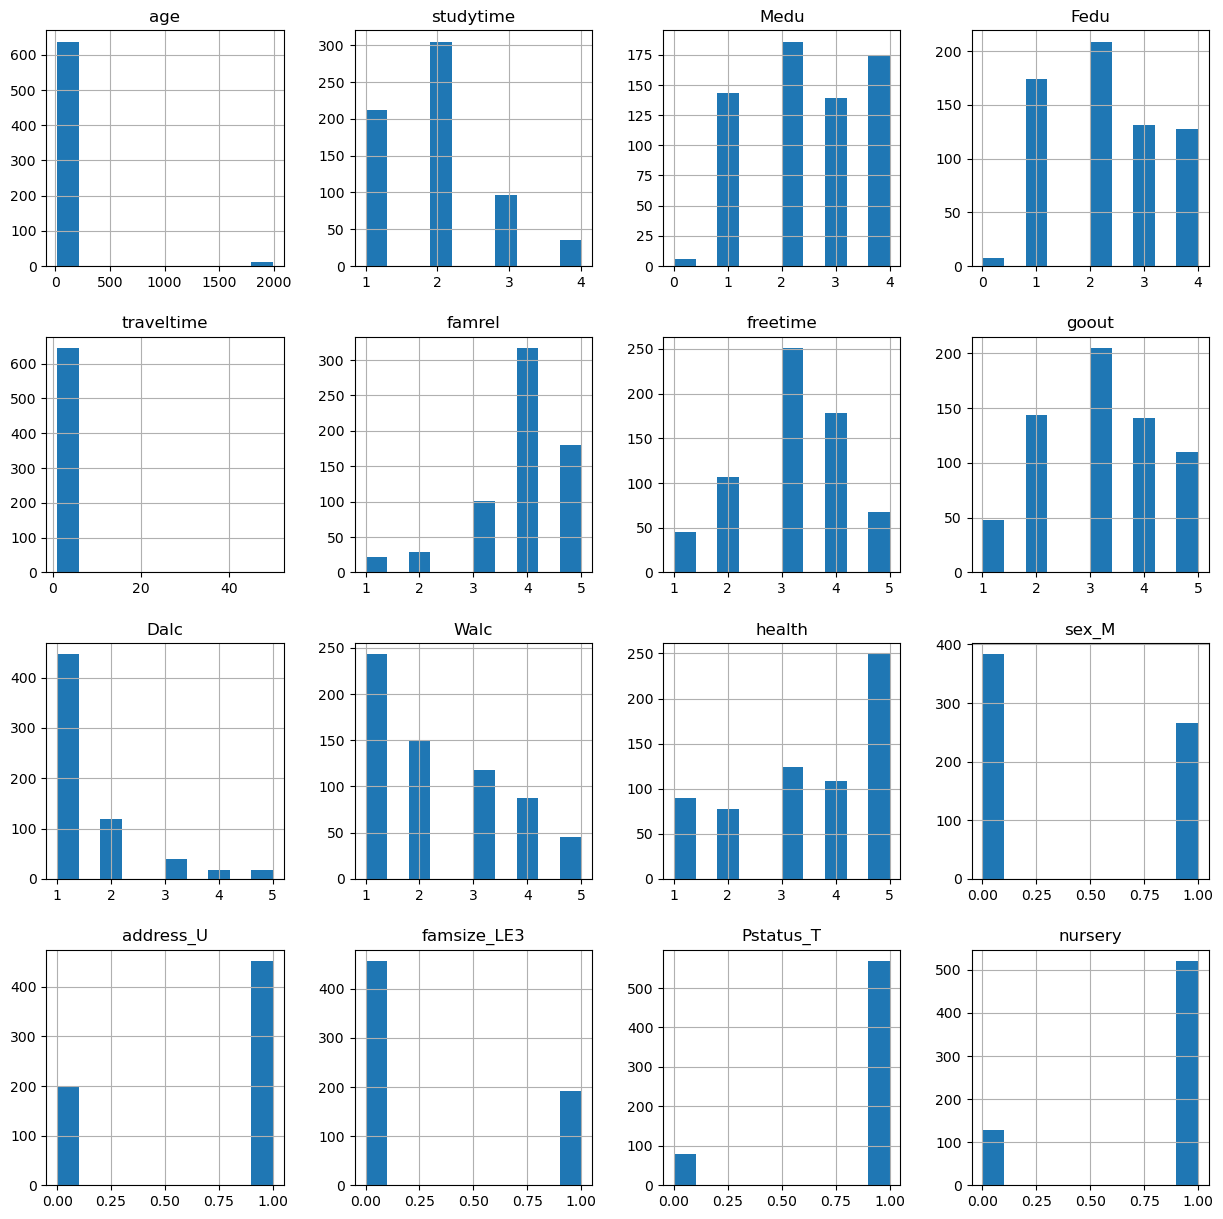

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Построение гистограмм для подозрительных признаков
data = pd.read_csv('data.csv')
suspicious_features = ['age', 'studytime', 'Medu', 'Fedu', 'traveltime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'nursery']
data[suspicious_features].hist(figsize=(15, 15))
plt.show()

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [34]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

normal_data = (data - data.min()) / (data.max() - data.min())

scores = pd.read_csv('scores.csv', header=None)
scores.columns = ['score']
model = LinearRegression()
val1 = normal_data.values
val2 = scores.values
result = cross_validate(model, val1, val2, cv = 4)
result['test_score']

ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
